WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 6

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import norm

## 1. Signal Detection Theory

Suppose that the probabilities that a neuron responds to a stimulus of strength $s$ with a firing rate between $r$ and $r+\Delta r$ is $p(r)\Delta r$ where
$$ p(r) = \frac{1}{\sqrt{2\pi}\sigma} exp\left(-\frac{(r-r_m)^2}{2 \sigma^2}\right) $$
with mean $r_m = 5+s$ and $\sigma = 1$. Plot $p(r)$ for the spontaneous activity, i.e.,
when no stimulus is presented ($s = 0$), and for stimuli with strengths $s$ = 1, 2, 3 and 4.

What is $d'$ for each of these stimuli?

Sensitivity for each stimulus is $s$

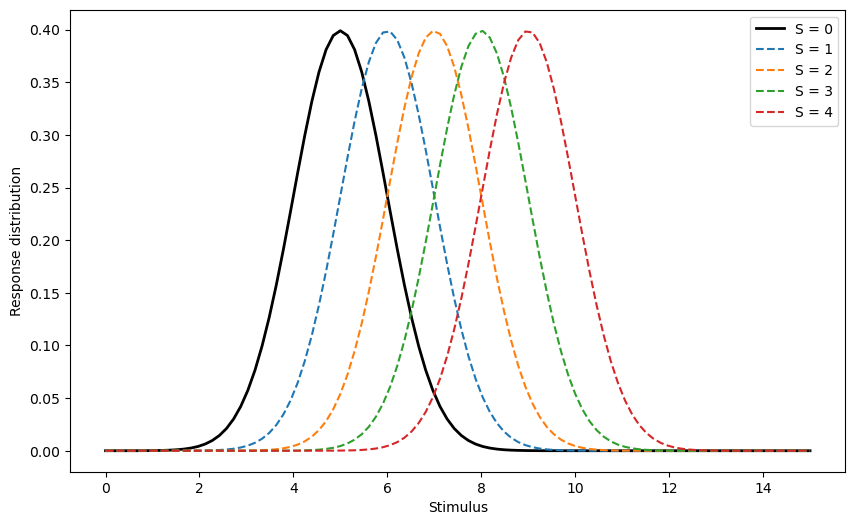

In [2]:
def p(response, stimulus, sigma = 1):
    r_m = stimulus + 5
    return 1/(np.sqrt(2 * np.pi)*sigma)*np.exp(-(response - r_m)**2 / (2*sigma**2))

stimulus_array = np.arange(0, 5, 1)
responses = np.linspace(0, 15, 100)

plt.figure(figsize=(10,6))
for i, stimulus in enumerate(stimulus_array):
    if i != 0:
        plt.plot(responses, p(responses, stimulus), label = f'S = {stimulus}', linestyle='dashed')
    else:
        plt.plot(responses, p(responses, stimulus), label = f'S = {stimulus}', linestyle='solid', linewidth=2, color='black')
plt.xlabel('Stimulus')
plt.ylabel('Response distribution')
plt.legend()
plt.show()

Plot the ROC curves for these stimuli.

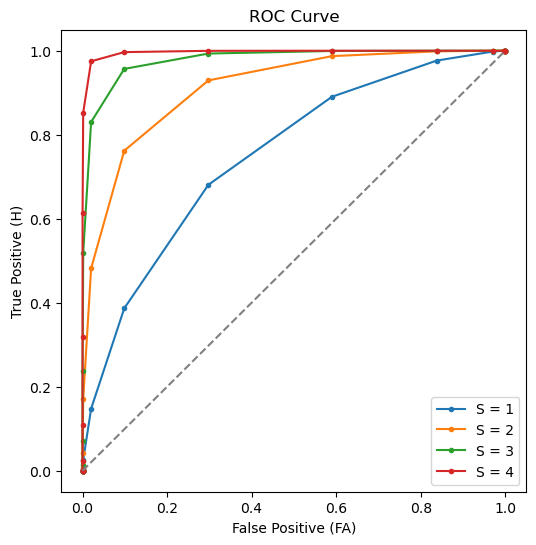

In [3]:
noise_response = p(responses, stimulus=0)
plt.figure(figsize=(6,6))
ROC_curves = []
for stimulus in stimulus_array[1:]:
    stimulus_response = p(responses, stimulus)
    ROC_points = []
    for beta in np.linspace(0, 15, 20):
        noise_response_beta = noise_response[responses >= beta]/np.sum(noise_response)
        stimulus_response_beta = stimulus_response[responses >= beta]/np.sum(stimulus_response)
        ROC_points.append((np.sum(noise_response_beta), np.sum(stimulus_response_beta)))
    ROC_points = np.array(ROC_points)
    ROC_curves.append(ROC_points)
    plt.plot(ROC_points[:,0], ROC_points[:,1], label=f'S = {stimulus}', marker='.')
plt.plot([0,1], [0,1], linestyle='dashed', color='gray')
plt.xlabel('False Positive (FA)')
plt.ylabel('True Positive (H)')
plt.title('ROC Curve')
plt.legend()
plt.show()


Plot the expected $p$(correct) obtained in a 2AFC task as a function of stimulus strength $s$.



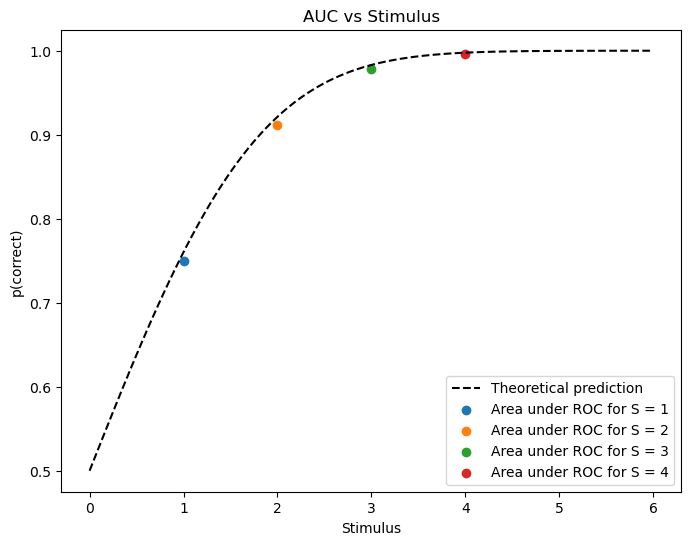

In [4]:
stimulus_linespace = np.linspace(0, 6, 100)
p_correct = norm.cdf((stimulus_linespace)/np.sqrt(2))

plt.figure(figsize=(8,6))
plt.plot(stimulus_linespace, p_correct, label='Theoretical prediction', color='black', linestyle='dashed')
for i, stimulus in enumerate(stimulus_array[1:]):
    auc = -np.trapz(ROC_curves[i][:,1], ROC_curves[i][:,0])
    plt.scatter(stimulus, auc, label=f'Area under ROC for S = {stimulus}', marker='o')
plt.xlabel('Stimulus')
plt.ylabel('p(correct)')
plt.title('AUC vs Stimulus')
plt.legend()
plt.show()
# np.trapz(ROC_curves[0][:,1], ROC_curves[0][:,0])

Simulate the 2AFC task and compare $p$(correct) for the different stimulus strengths with the calculated values as a function of the number of trials.

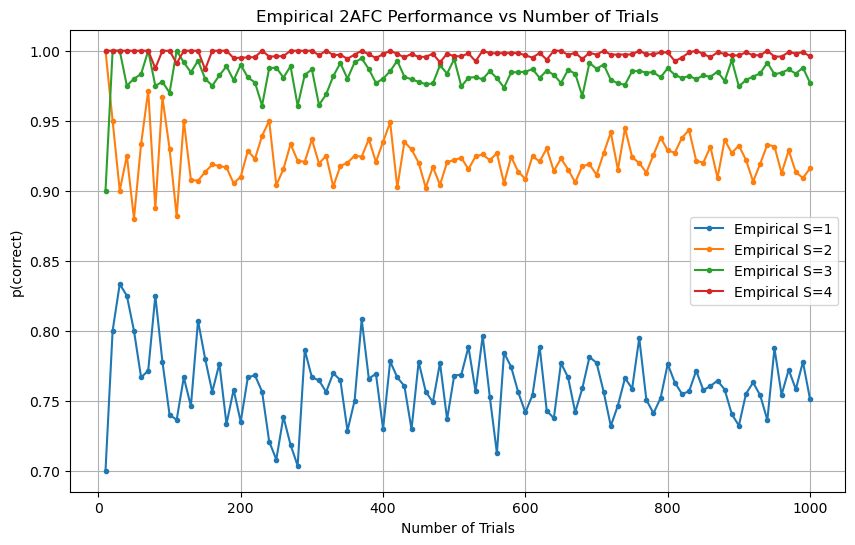

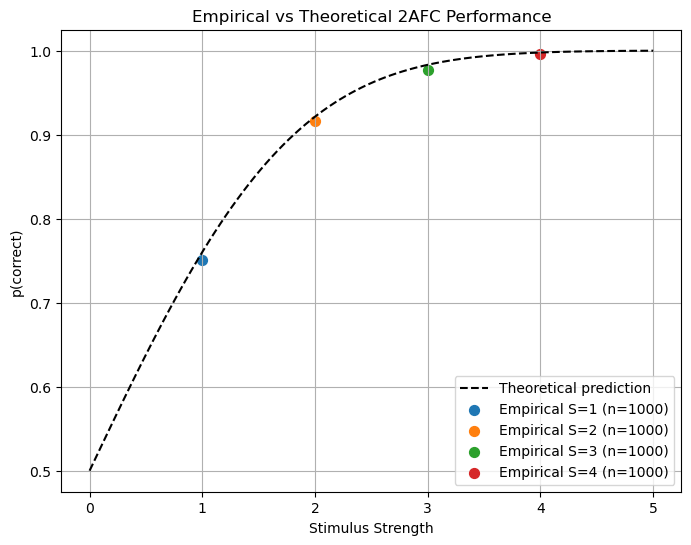

In [12]:
# ---------- Parameters ----------
stimulus_array = np.arange(0, 5)   # stimulus strengths 0,1,2,3,4
sigma = 1
n_trials_array = np.arange(10, 1001, 10)  # varying number of trials
stimulus_linespace = np.linspace(0, 5, 100)  # for theoretical curve


# ---------- Theoretical 2AFC performance ----------
p_correct_theoretical = norm.cdf(stimulus_linespace / np.sqrt(2))

# ---------- Empirical simulation ----------
# Store results in a dictionary
empirical_results = {}

for stimulus in stimulus_array[1:]:  # skip stimulus=0 if you like
    p_correct_empirical_array = []
    for n_trials in n_trials_array:
        # Simulate n_trials
        noise_samples = np.random.randn(n_trials)
        stimulus_samples = np.random.randn(n_trials) + stimulus
        correct = np.sum(stimulus_samples > noise_samples)
        p_correct_empirical_array.append(correct / n_trials)
    
    empirical_results[stimulus] = np.array(p_correct_empirical_array)

# ---------- Plot: p(correct) vs number of trials ----------
plt.figure(figsize=(10,6))
for stimulus, p_emp in empirical_results.items():
    plt.plot(n_trials_array, p_emp, label=f'Empirical S={stimulus}', marker='o', markersize=3)
plt.xlabel('Number of Trials')
plt.ylabel('p(correct)')
plt.title('Empirical 2AFC Performance vs Number of Trials')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot: Empirical vs Theoretical ----------
plt.figure(figsize=(8,6))
plt.plot(stimulus_linespace, p_correct_theoretical, 'k--', label='Theoretical prediction')
for stimulus, p_emp in empirical_results.items():
    plt.scatter([stimulus], [p_emp[-1]], label=f'Empirical S={stimulus} (n={n_trials_array[-1]})', s=50)
plt.xlabel('Stimulus Strength')
plt.ylabel('p(correct)')
plt.title('Empirical vs Theoretical 2AFC Performance')
plt.legend()
plt.grid(True)
plt.show()


Repeat for the case of $r_m = 5+0.5s$ and activation-dependent noise $\sigma = 0.5s$

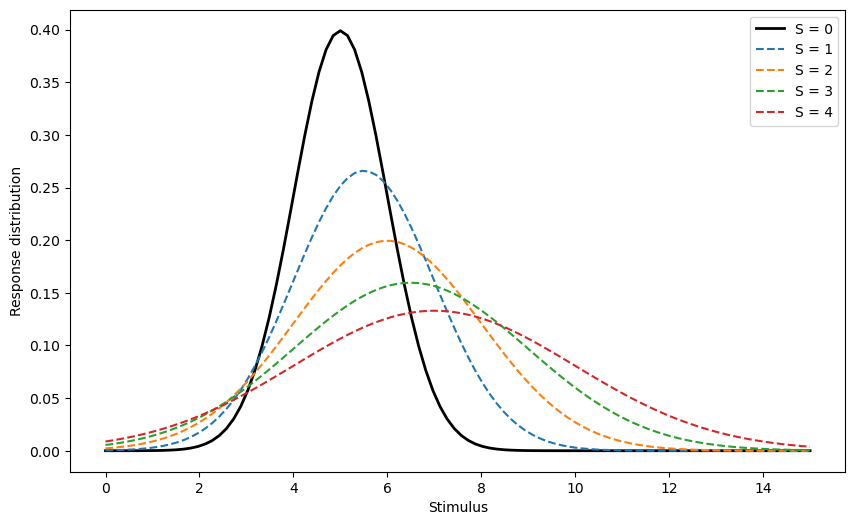

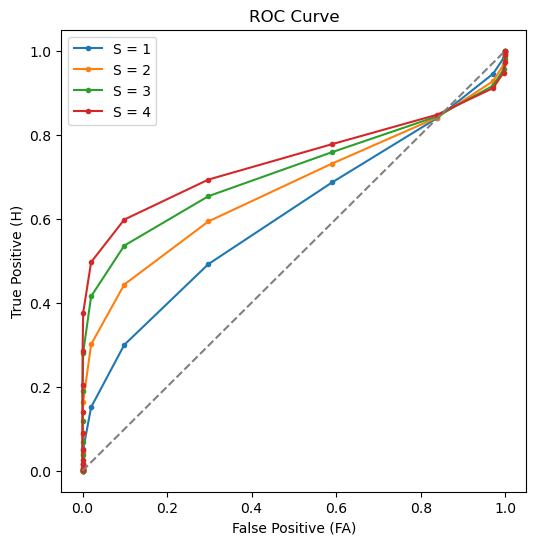

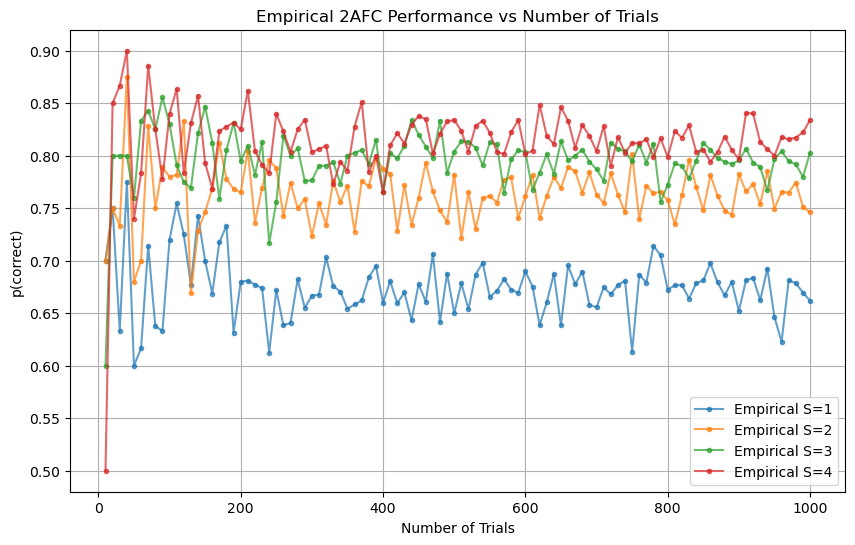

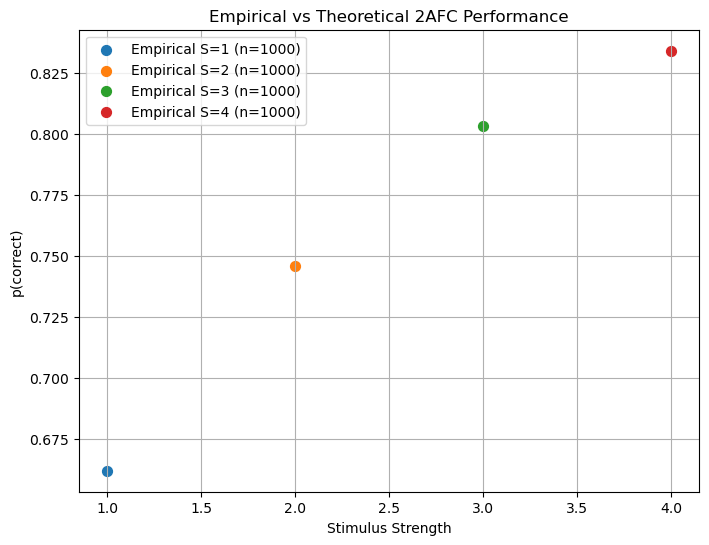

In [18]:
# ---------- Parameters ----------
stimulus_array = np.arange(0, 5)   # stimulus strengths 0,1,2,3,4
sigma = 1
n_trials_array = np.arange(10, 1001, 10)  # varying number of trials
stimulus_linespace = np.linspace(0, 5, 100)  # for theoretical curve

def p_new(response, stimulus):
    r_m = 0.5*stimulus + 5
    sigma = 0.5*stimulus + 1
    return 1/(np.sqrt(2 * np.pi)*sigma)*np.exp(-(response - r_m)**2 / (2*sigma**2))

stimulus_array = np.arange(0, 5, 1)
responses = np.linspace(0, 15, 100)

plt.figure(figsize=(10,6))
for i, stimulus in enumerate(stimulus_array):
    if i != 0:
        plt.plot(responses, p_new(responses, stimulus), label = f'S = {stimulus}', linestyle='dashed')
    else:
        plt.plot(responses, p_new(responses, stimulus), label = f'S = {stimulus}', linestyle='solid', linewidth=2, color='black')
plt.xlabel('Stimulus')
plt.ylabel('Response distribution')
plt.legend()
plt.show()

#### ROC Curves ######

noise_response = p(responses, stimulus=0)
plt.figure(figsize=(6,6))
ROC_curves = []
for stimulus in stimulus_array[1:]:
    stimulus_response = p_new(responses, stimulus)
    ROC_points = []
    for beta in np.linspace(0, 15, 20):
        noise_response_beta = noise_response[responses >= beta]/np.sum(noise_response)
        stimulus_response_beta = stimulus_response[responses >= beta]/np.sum(stimulus_response)
        ROC_points.append((np.sum(noise_response_beta), np.sum(stimulus_response_beta)))
    ROC_points = np.array(ROC_points)
    ROC_curves.append(ROC_points)
    plt.plot(ROC_points[:,0], ROC_points[:,1], label=f'S = {stimulus}', marker='.')
plt.plot([0,1], [0,1], linestyle='dashed', color='gray')
plt.xlabel('False Positive (FA)')
plt.ylabel('True Positive (H)')
plt.title('ROC Curve')
plt.legend()
plt.show()


# ---------- Theoretical 2AFC performance ----------
# p_correct_theoretical = norm.cdf(stimulus_linespace / np.sqrt(2))

# ---------- Empirical simulation ----------
# Store results in a dictionary
empirical_results = {}

for stimulus in stimulus_array[1:]:  # skip stimulus=0 if you like
    p_correct_empirical_array = []
    for n_trials in n_trials_array:
        # Simulate n_trials
        noise_samples = np.random.randn(n_trials)
        stimulus_samples = np.random.randn(n_trials)*0.5*stimulus + stimulus*0.5
        correct = np.sum(stimulus_samples > noise_samples)
        p_correct_empirical_array.append(correct / n_trials)
    
    empirical_results[stimulus] = np.array(p_correct_empirical_array)

# ---------- Plot: p(correct) vs number of trials ----------
plt.figure(figsize=(10,6))
for stimulus, p_emp in empirical_results.items():
    plt.plot(n_trials_array, p_emp, label=f'Empirical S={stimulus}', marker='o', markersize=3, alpha=0.7)
plt.xlabel('Number of Trials')
plt.ylabel('p(correct)')
plt.title('Empirical 2AFC Performance vs Number of Trials')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot: Empirical vs Theoretical ----------
plt.figure(figsize=(8,6))
# plt.plot(stimulus_linespace, p_correct_theoretical, 'k--', label='Theoretical prediction')
for stimulus, p_emp in empirical_results.items():
    plt.scatter([stimulus], [p_emp[-1]], label=f'Empirical S={stimulus} (n={n_trials_array[-1]})', s=50)
plt.xlabel('Stimulus Strength')
plt.ylabel('p(correct)')
plt.title('Empirical vs Theoretical 2AFC Performance')
plt.legend()
plt.grid(True)
plt.show()


## 2. Bayes Theorem

**2a.**
Consider an experiment where the sensitivity of a neuron to a certain stimulus
is investigated. In some trials, the stimulus is presented ($s = 1$), in some trials, no
stimulus is presented ($s = 0$). For simplicity, all the experimenter records is whether
the neuron fires spikes in a trial ($r = 1$) or not ($r = 0$). The following matrix
shows the number of trials depending on trial type and response:

| $ $ | s=0 | s=1 |
| --- | --- | --- |
| **r=0** | 70    | 20    |
| **r=1** | 30    | 90    |

Calculate from this matrix the probabilities $p(s)$, $p(r)$, the joint probabilities $p(s, r)$,
and the conditional probabilities $p(r|s)$ and $p(s|r)$. Verify Bayes Theorem by also calculating
$p(s|r)$ from $p(r|s)$, $p(s)$, and $p(r)$.

**2b.**
Imagine a neuron that analyzes neural activity in the visual system after each
eye movement, i.e., about once every 300 ms, and responds whenever it detects the
high-level feature “Tiger”, triggering an escape reaction. Suppose this tiger detector
correctly responds to the appearance of a tiger with a probability of .99,
and stays silent with probability .999 when there is no tiger. The probability of
encountering a tiger in the jungle is, on average, once in 6 hours. What is the
probability that there is actually a tiger when the tiger detector responds?